In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot, imshow
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import cv2
import os

In [2]:
train_df = pd.read_csv('/home/arjun/Desktop/Datasets/MNIST/raw/mnist_train.csv')
train_ds = np.array(train_df)

In [3]:
train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = np.array(train_df['label'])
X = np.array(train_df.drop('label', axis=1)).reshape(-1,28,28)

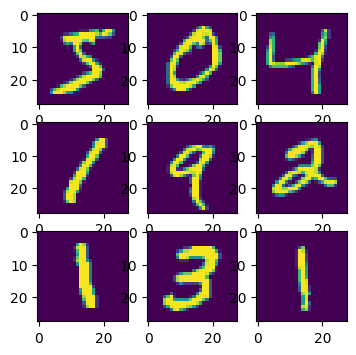

In [5]:
data = X[:9]
fig = plt.figure(figsize=(4,4))
for i,val in enumerate(data):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(val)

In [6]:
# Lets start with using pytorch to make a two layered MLP

import torch
import torch.nn as nn
import random
import torch.nn.functional as F

X = torch.tensor(X).float()
y = torch.tensor(y)

class MLP(nn.Module):
    def __init__(self,inp, h1, out):
        super(MLP, self).__init__()
        self.l1 = nn.Linear(inp, h1)
        self.l2 = nn.ReLU()
        self.l3 = nn.Linear(h1, out)
    
    def forward(self,x):
        out = self.l1(x) 
        out = self.l2(out) 
        out = self.l3(out) 
        return out

model = MLP(28*28, 120, 10)

In [7]:
loss_category = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=.0001)

/home/arjun/AI_ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
bs = 1000
for epoch in range(1000):
    batch = [random.randint(0,len(X)-1) for _ in range(bs)]
    train = []
    train_y = []
    for i in batch:
        train.append(X[i])
        train_y.append(y[i])
    x = torch.stack(train).view(-1,28*28)
    y_org = torch.stack(train_y).view(-1,1)
    y_org = F.one_hot(y_org).view(-1,10).float()
    
    # forward
    y_pred = model(x)
    loss = loss_category(y_pred,y_org)

    # backward
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()
    if epoch%100 == 0: print(loss.item())

32.0527229309082
1.6660103797912598
0.8514215350151062
0.625269889831543
0.7589024305343628
0.40392932295799255
0.3888658583164215
0.23000197112560272
0.2777654230594635
0.20756827294826508


In [9]:
# inference
predict = lambda x: torch.argmax(model(x.view(1,-1))).item()

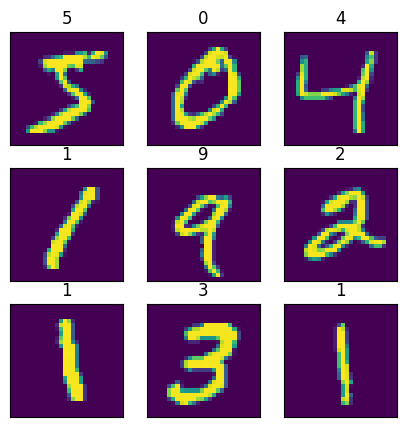

In [10]:
data = X[:9]
fig = plt.figure(figsize=(5,5))
for i,val in enumerate(data):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(val)
    ax.set_title(predict(val))
    ax.tick_params(length=0)  # Remove tickmarks
    ax.set_xticklabels([])      # Hide X-axis labels
    ax.set_yticklabels([]) 

In [11]:
# Prolly super overfitting :(

In [12]:
# Now rewrite the whole thing with numpy only!!!